## Backpropagation Multilayered Neural Network
### Theoretical background
**Most Commonly Used Connection Method of Artificial Neurons are Multilayer Networks**

<div style="text-align: center;">
    <img src="multilayer_network.png" alt="Multilayered Neural Network" style="width: 50%;">
</div>

From the depicted image, it is evident that a neural network is constructed minimally with three layers of neurons: input, output, and at least one internal layer. Always between two neighboring layers, there is what is called full interconnection of neurons, meaning each neuron of a lower layer is connected to all neurons of the higher layer. How is information processed in such a neural network? The example begins with single-pass, therefore feedforward filtering of the signal:

1. Neurons are first excited to the corresponding level (ranging from 0 to 1) in the output layer.
2. This excitation is transferred via connections to the next layer and modified (either amplified or weakened).
3. Each neuron in this higher layer sums up the adjusted signals from the lower-layer neurons and is excited to a level determined by its activation function.
4. This process propagates through all internal layers until the output layer, where we then obtain the excitation states of all its neurons.

By this method, we have obtained a neural response to an input stimulus defined by the excitation of the input-layer neurons. This process of signal propagation occurs similarly in biological systems, where, for instance, the input layer may consist of visual cells, and in the output layer of the brain, specific objects are identified.

The most crucial question remains: how are the synaptic weights that lead to a correct response to the input signal determined? The process of setting synaptic weights is again linked with the concept of learning - adaptation - of neural networks. Another issue is the ability to *generalize* - to abstract - from the learned material, in other words, how the neural network is capable of reasoning about phenomena that were not part of the learning process but can somehow be deduced. Here too, there is a sort of analogy with human learning, highlighted by the difference between rote memorization and learning associated with the ability to understand the issues so that new insights can be derived from the previous ones.

What is necessary for teaching a neural network? It includes, first, a so-called *training set* containing elements that describe the problem at hand, and then a method that can fix these samples in the neural network in the form of synaptic weight values, including the aforementioned ability to generalize. Let us first stop at the training set. Each pattern of the training set describes how the neurons of the input and output layers are excited.

Formally, we can define the training set $T$ as a set of elements (patterns), which are defined as ordered pairs in the following manner:

$$T = \{ (I_1, O_1), (I_2, O_2), \ldots, (I_p, O_p) \}$$

where each $I_i$ and $O_i$ are vectors representing the excitation of the input and output layers respectively:

$$
I_i = [i_{i1}, i_{i2}, \ldots, i_{in}], \quad i_{ij} \in [0,1]
$$
$$
O_i = [o_{i1}, o_{i2}, \ldots, o_{im}], \quad o_{ij} \in [0,1]
$$

Definitions:
- $p$: number of patterns in the training set
- $I_i$: vector of excitations of the input layer consisting of $n$ neurons
- $O_i$: vector of excitations of the output layer consisting of $m$ neurons
- $i_j, o_j$: excitation of the $j$-th neuron of the input and output layer respectively.

The method that enables adaptation of a neural network over a given training set is called backpropagation, which translates to the method of backward propagation. Unlike the forward propagation of signals in the neural network already described, this adaptation method involves the opposite spread of information from the layers above to the lower layers. Let's first attempt a verbal description of this method:

1. First, take the vector $I_i$ of the $i$-th element of the training set, which excites the neurons of the input layer to the corresponding level.
2. In a known manner, propagate this signal forward until it reaches the neurons of the output layer.
3. Compare the desired state given by the vector $O_i$ of the $i$-th element of the training set with the actual response of the neural network.
4. The difference between the actual and desired response defines the error of the neural network. This error is then adjusted in a certain ratio - learning rate - and "fed back" into the neural network by adjusting synaptic weights from the upper layers to the lower layers so that the error in the subsequent response is reduced.
5. After exhausting the entire training set, the total error across all training patterns is evaluated, and if it is higher than the desired, the entire process is repeated.

Let's next consider a more exact definition of the backpropagation method (BP). The essence of the BP method lies in searching for the minimum of the error function $E$ defined in the following manner:

$$
E = \frac{1}{2} \sum_{i=1}^p \sum_{j=1}^m (y_j - o_j)_i^2,
$$

where:
- $y_j$: actual response of the $j$-th neuron in the output layer
- $o_j$: desired response of the $j$-th neuron in the output layer given by the training set pattern
- $p$: total number of patterns in the training set
- $m$: number of neurons in the output layer

The way to achieve this goal is through the adjustment of synaptic weights between neurons $i$ and $j$ according to the following formula:

$$
\Delta w_{ij} = -\eta \frac{\partial E}{\partial w_{ij}}
$$

where:
- $\eta$: learning rate coefficient

Let's attempt to clarify the expression given by the product of the learning coefficient $\eta$ and the partial derivative of the error $E$ with respect to the synaptic weight $w_{ij}$. If the value of this derivative is large and positive, it indicates that even a minimal increase in the synaptic weight leads to a large error in the neural network's response. Therefore, it is necessary to "reduce" from the current value of the synaptic weight, as this will decrease the error. Similarly, for a large but negative value of the derivative, it is necessary to increase the value of the synaptic weight if the response error in the next step is to be lower. The magnitude of the synaptic weight adjustments are logically determined both by the values of these derivatives and the aforementioned learning rate coefficient.

Next, we will demonstrate how to calculate the value of the derivative from the expression $\Delta w_i$, simplifying by omitting the index $j$ of the given neuron. The initial state of the neural network is determined by randomly generating small positive values for synaptic weights.

The calculation is then performed in the following direction:

$$
\frac{\partial E}{\partial w_i} = \frac{\partial E}{\partial y} \cdot \frac{\partial y}{\partial z} \cdot \frac{\partial z}{\partial w_i},
$$

where the following relationships hold:

$$z = \sum_{i=0}^n w_i x_i,$$
$$y = \frac{1}{1 + e^{-\lambda z}},$$

$$\frac{\partial z}{\partial w_i} = x_i,$$

$$\frac{\partial y}{\partial z} = y \cdot (1 - y) \cdot \lambda.$$

The final problem is how to determine the value of the expression $\frac{\partial E}{\partial y}$. Initially, consider the situation where a given neuron is a component of the output layer of the neural network:

<div style="text-align: center;">
    <img src="output_layer_error.png" alt="Output layer error" style="width: 50%;">
</div>

It can then be deduced that for the sought expression and for pattern \( k \), the following holds:
$$
\frac{\partial E}{\partial y} = (y - o).
$$

Furthermore, we assume that the neuron is located in one of the internal layers:

<div style="text-align: center;">
    <img src="inner_layer_error.png" alt="Inner layer error" style="width: 50%;">
</div>

Starting with the following index convention, let us try to determine which layer the sought expression belongs to. From there, the relationship is given by:

$$
\frac{\partial E}{\partial y} = \sum_{i=1}^m \frac{\partial E}{\partial z^i} \cdot \frac{\partial z^i}{\partial y},
$$

where the sum is taken over all neurons of the layer immediately above the considered neuron. Based on the validity of:

$$
\frac{\partial z^i}{\partial y} = w^i,
$$

the following substitution can be performed:

$$
\frac{\partial E}{\partial y} = \sum_{i} \frac{\partial E}{\partial z^i} \cdot w^i.
$$

The resulting relationship for the gradient computation after reintroducing all indexes takes this form:

$$
\frac{\partial E}{\partial w_{ij}} = \delta_{jk} \cdot y_j \cdot (1 - y_j) \cdot \lambda \cdot x_{ij}.
$$

The difference $\delta_{jk}$ between the actual and the desired response of neuron $j$ for pattern $k$ in higher or the same layer is defined as follows:

$$
\delta_{jk} = (y_j - o_j)_k, \quad \delta_{jk} = \sum_{i}^m \delta^{ik} \cdot y^i \cdot (1 - y^i) \cdot \lambda \cdot w^{ij},
$$

where the sum is carried out over all neurons of the higher or current layer. The expression is primarily necessary to first establish the error of neurons in higher layers, based on which the error of neurons in lower layers can be calculated.

Such a network is called *homogeneous*, because we assumed that thresholds and steepness of neurons are the same. However, nothing prevents us from subjecting not only synaptic weights but also thresholds and the steepness of the sigmoid to adaptation. The activation dynamics are then expressed as follows:

$$
z = \sum_{i=1}^n w_i x_i \quad \text{and} \quad y = \frac{1}{1 + e^{-\lambda(z - \theta)}}
$$

<div style="text-align: center;">
    <img src="activation_function.png" alt="Activation function" style="width: 50%;">
</div>

In this way, a so-called *heterogeneous network* can be achieved, where each neuron can have its own activation dynamics. This capability, in most cases, enhances the network's ability to converge towards a learned state. The method that utilizes this capability is called *parametric backpropagation* (PAB). The basis of PAB involves defining the error function $E$ dependent not only on the vector of synaptic weights but also on the vector of sigmoid steepness and thresholds. Formally, therefore:

$$
E = E(w, \lambda, \theta).
$$

Adjustment of neuron steepness proceeds according to analogous rules as in the case of synaptic weights. In our case, it will be expressed as:

$$
\Delta \lambda_i = -\xi \frac{\partial E}{\partial \lambda_i},
$$

$$
\Delta \theta_i = -\psi \frac{\partial E}{\partial \theta_i},
$$

where:
- $\xi{,} \psi$: learning coefficients for steepness and threshold values,

To determine the values of the derivatives for steepness or respective threshold values of the selected neuron, the following expressions are used:

$$
\frac{\partial E}{\partial \lambda} = \frac{\partial E}{\partial y} \cdot \frac{dy}{d\lambda}, \quad \text{where} \quad \frac{dy}{d\lambda} = y \cdot (1-y) \cdot (z - \theta),
$$

respectively

$$
\frac{\partial E}{\partial \theta} = \frac{\partial E}{\partial y} \cdot \frac{dy}{d\theta}, \quad \text{where} \quad \frac{dy}{d\theta} = y \cdot (1 - y) \cdot (-\lambda),
$$

and $\frac{\partial E}{\partial y}$ is calculated in the same way as described in the previous text, depending on whether the neuron is in the outer or an inner layer.




### Implemenation in Python

**Import modules**

In [3]:
import numpy as np
import pandas as pd
from backpropagation import BackPropagation


**Create training set from diagnosis.xlsx**

In [4]:
data = pd.read_excel('diagnosis.xlsx')
data.head()
training_set = []
for index, row in data.iterrows():
    features = [row['Fever'], row['Cough'], row['Headache'], row['Tiredness'], row['Night Sweat']]
    result = [row['Pneumonia'], row['Flu'], row['Cold']]
    training_set.append((features, result))
    
training_set

[([0.0, 0.5, 0.5, 0.0, 0.0], [0.0, 0.0, 1.0]),
 ([1.0, 1.0, 1.0, 1.0, 0.0], [0.0, 1.0, 0.0]),
 ([0.5, 1.0, 0.0, 1.0, 1.0], [1.0, 0.0, 0.0]),
 ([0.0, 0.5, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0]),
 ([1.0, 0.5, 1.0, 0.5, 0.0], [0.0, 1.0, 0.0]),
 ([1.0, 1.0, 0.0, 0.5, 0.5], [1.0, 0.0, 0.0])]

**Initialize and learn multilayered neural network**
* training set is given by a list [([i11, i12 ... i1N],[o11 ... o1M]), ... ([ik1, ..., ikN],[ok1, ..., okM])]
* topology [num_of_features, num_of_inner_neurons, num_of_inner_neurons, num_of_results]
* learning rates [for_weights, for_biases, for_slopes]
* number of leraning epochs

In case of learning rates for biases and slopes equal 0 only weights based learning is executed

In [5]:
bpnn = BackPropagation(training_set,[5, 5, 5, 3], [0.3, 0.3, 0.3], 1000)
bpnn.backpropagation()
for row in training_set:
    net_input = row[0]
    bpnn.feed_forward(net_input)
    net_output = bpnn.output_activation.reshape([1,3])
    print("Input: ", net_input, " Output: ", net_output.flatten().tolist())




Input:  [0.0, 0.5, 0.5, 0.0, 0.0]  Output:  [0.0, 0.01, 0.99]
Input:  [1.0, 1.0, 1.0, 1.0, 0.0]  Output:  [0.01, 0.99, 0.01]
Input:  [0.5, 1.0, 0.0, 1.0, 1.0]  Output:  [0.99, 0.0, 0.01]
Input:  [0.0, 0.5, 0.0, 0.0, 0.0]  Output:  [0.0, 0.01, 0.99]
Input:  [1.0, 0.5, 1.0, 0.5, 0.0]  Output:  [0.01, 0.99, 0.01]
Input:  [1.0, 1.0, 0.0, 0.5, 0.5]  Output:  [0.99, 0.0, 0.01]


**Draw the history of learning**

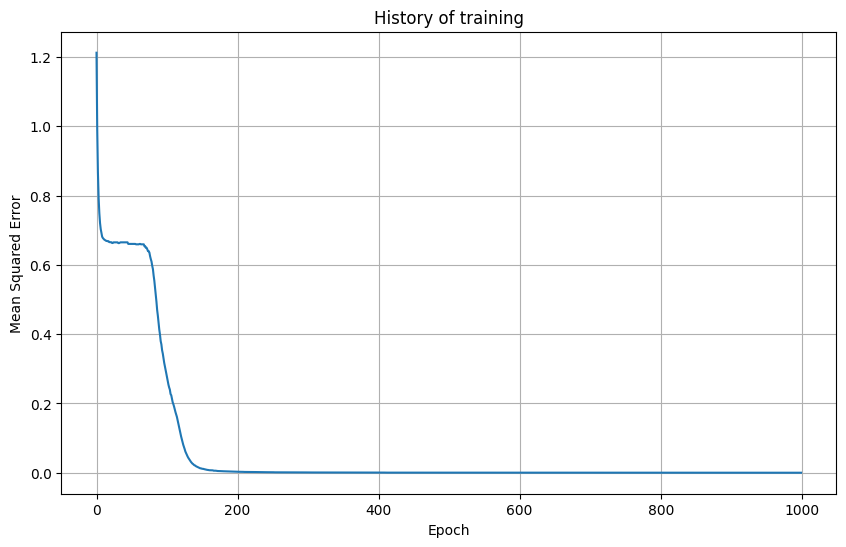

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(bpnn.history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('History of training')
plt.grid(True)
plt.show()

### Usage of diagnosis app

In [7]:
input_data = pd.read_excel('diagnosis_input.xlsx')
input_data.head()
input_set = []
for index, row in input_data.iterrows():
    features = [row['Fever'], row['Cough'], row['Headache'], row['Tiredness'], row['Night Sweat']]
    input_set.append(features)

output_set = []
for net_input in input_set:
    net_output = bpnn.run(net_input)
    output_set.append(net_output)
    print("Input: ", net_input, " Output: ", net_output)
# Create a DataFrame for the output data

header = list(data.columns)
output_data = pd.DataFrame(columns=header)

for i in range(len(input_set)):
    row = input_set[i] + output_set[i]
    output_data.loc[i] = row

output_data.to_excel('diagnosis_output.xlsx', index=False)
output_data

Input:  [0.0, 0.5, 0.0, 0.0, 0.0]  Output:  [0.0, 0.01, 0.99]
Input:  [1.0, 1.0, 1.0, 1.0, 0.0]  Output:  [0.01, 0.99, 0.01]
Input:  [0.5, 1.0, 0.0, 1.0, 1.0]  Output:  [0.99, 0.0, 0.01]
Input:  [1.0, 0.5, 0.5, 0.5, 0.0]  Output:  [0.01, 0.99, 0.0]
Input:  [0.0, 0.5, 0.0, 0.2, 0.0]  Output:  [0.0, 0.01, 0.99]


,Fever,Cough,Headache,Tiredness,Night Sweat,Pneumonia,Flu,Cold
0,0.0,0.5,0.0,0.0,0.0,0.00,0.01,0.99
1,1.0,1.0,1.0,1.0,0.0,0.01,0.99,0.01
2,0.5,1.0,0.0,1.0,1.0,0.99,0.00,0.01
3,1.0,0.5,0.5,0.5,0.0,0.01,0.99,0.00
4,0.0,0.5,0.0,0.2,0.0,0.00,0.01,0.99


### Mean squared error for the training set

In [8]:
error = bpnn.calculate_mean_squared_error()
print("Means squared error: ", error)

Means squared error:  0.00023333333333333352


### Max error of the single output neuron for a training net

In [9]:
max_error = bpnn.calculate_max_error()
print("Max error of the single output neuron: ", max_error)

Max error of the single output neuron:  0.010000000000000009
